# 1. 주성분 분석(Principal Component Analysis, PCA)  

- 대표적인 차원 축소(dimensionality reduction) 알고리즘  
- 정보 손실을 최소화하면서 데이터의 차원을 더 작은 차원으로 줄이는 것을 목적으로 함

<pr>

## 1) 투영과 분산
- 데이터를 잘 표현하는 축을 찾는다는 것?

<img src='rc/projection.png' alt='lbp' width="640" heigh="480">  
  
- 원래 공간에 퍼져 있는 정도가 변환된 공간에서도 얼마나 잘 유지가 되는지를 평가 척도로 사용 -> **분산**으로 측정  
- 단계  
  - ① 데이터에 대해서 분산이 가장 큰 축을 찾고 그 축으로 투영된 데이터의 분산을 계산  
  - ② 첫 번째 축에 직교하면서 두 번째로 분산이 큰 축을 찾음
  - ③ 데이터 차원 수만큼의 축을 찾을 때까지 ①~② 과정을 반복  
- i번째 축(단위 벡터)을 i번째 주성분(principal component)이라고 함  

<pr>

<img src='rc/pca.gif' alt='lbp' width="800" heigh="600">  

## 2) 계산 및 적용
- ※ 고유값(eigenvalue)과 고유벡터(eigenvector)   
  - 임의의 정방행렬 A(선형변환 함수)에 대해 다음 식을 만족하는 0이 아닌 벡터 $\bf{x}$를 **고유벡터**, 상수 $\lambda$를 **고유값**이라고 정의
$$
A\bf{x}=\lambda \bf{x}
$$
  - 기하학적 의미  
    - 수많은 벡터 중 어떤 벡터 $\bf{x}$는 $A$에 의해 변환된 결과 $A\bf{x}$와 크기만 $\lambda$만큼 다르고 방향은 같은 벡터임 => 이러한 벡터 $\bf{x}$를 고유벡터라고 함  
    - 참고: https://twlab.tistory.com/46
  
<br>  

- $\bf{\Sigma}$를 공분산 행렬이라고 할 때, PCA를 풀어서 나온 식에서 $\bf{u}$는 고유벡터, $\lambda$는 고유값에 해당함  
$$
\bf{\Sigma} \bf{u} = \lambda \bf{u}
\tag{1}
$$

<br>  

- 즉, 공분산 행렬 $\bf{\Sigma}$를 구한 다음 $\bf{\Sigma}$의 고유벡터 $\bf{u}$를 찾으면 데이터의 분산을 잘 표현하는 주성분을 찾을 수 있음  
- 분산 $\lambda$을 기준으로 내림차순 정렬을 한 후, 상위 d개 만큼의 주성분만 선정하여 데이터의 차원을 D -> d차원(d < D)으로 줄임  

$$
U = \begin{bmatrix}
\bf{u}_1 \\
\bf{u}_2 \\
\vdots \\
\bf{u}_d
\end{bmatrix}
$$
- 입력 벡터 $\bf{x}$를 선정된 주성분 행렬 $U$를 사용하여 출력 벡터 $\bf{y}$로 변환  
$$
\bf{y} = U \bf{x}
\tag{2}
$$

<br>

- 선정한 주성분만 사용하여 원래 벡터 $\bf{x}$로 복원  
$$
\bf{x} = U^{-1}\bf{y}
\tag{3}
$$


#### [Reference]
- [link #1] https://excelsior-cjh.tistory.com/167  
- [link #2] https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/  
- [link #3] https://www.learnopencv.com/eigenface-using-opencv-c-python/  

# 2. Practice  
- 얼굴 데이터셋   
 LFW(Labeled Faces in the Wild): http://mlsp.cs.cmu.edu/courses/fall2013/assignments/assignment2/lfw1000.zip  
<br> 
- PCA 라이브러리 설치  
  - pip install scikit-learn

## 1) 데이터 확인하기

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## 파일 리스트 읽어오기
listOfFiles = glob.glob('lfw1000/*.pgm')  # 지정한 경로 내 확장자가 .pgm인 파일을 모두 읽어서 리스트로 반환
nData = len(listOfFiles)                  # 파일 개수
print("# of files = {}".format(nData))

## 이미지 배열로 저장하기
faces = []
for file in listOfFiles:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    faces.append(img)

faces = np.array(faces)   # list -> array

## 데이터셋 정보 확인하기
print(type(faces))
print(faces.dtype)
print(faces.shape)

# of files = 1071
<class 'numpy.ndarray'>
uint8
(1071, 64, 64)


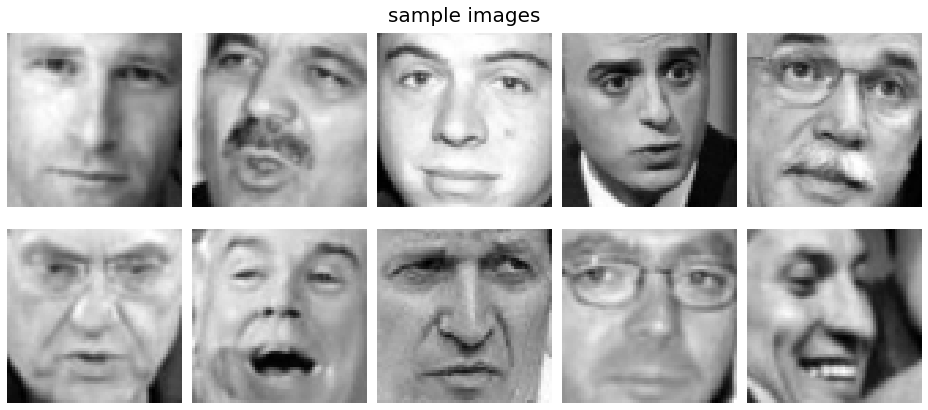

In [2]:
## 데이터 샘플 확인해보기
plt.figure(figsize=(13,6))
plt.suptitle('sample images', fontsize=20)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

## 3) Scikit-Learn을 이용한 PCA 적용하기
- 각 요소들의 행렬 크기  
  - 단일 데이터 (64x64): 4096  
  - 학습 데이터셋: 1071×4096  
  - 공분산행렬: 4096×4096  
  - 고유값: k (상위 k개 주성분)
  - 고유벡터: k×4096  

In [3]:
from sklearn.decomposition import PCA

## 2차원 -> 1차원 벡터 형태로 변환
print("Before reshape = {}".format(faces.shape))
faces = faces.reshape((nData, -1))
print("After reshape = {}".format(faces.shape))

print()

## PCA 적용 (정수형 파라미터 입력 -> 사용할 주성분 개수를 지정)
pca = PCA(n_components=10)
pca.fit(faces)                             # 수식 (1)에 해당
eigenVectors = pca.transform(faces)        # 수식 (2)에 해당
# eigenVectors = pca.fit_transform(faces)    # 수식 (1) & (2)에 해당
print("shape of eigenVectors  = {}".format(eigenVectors.shape))
print("shape of components = {}".format(pca.components_.shape))
print("explained_variance_ratio = {}".format(pca.explained_variance_ratio_))

Before reshape = (1071, 64, 64)
After reshape = (1071, 4096)

shape of eigenVectors  = (1071, 10)
shape of components = (10, 4096)
explained_variance_ratio = [0.29378922 0.12629319 0.06304694 0.04017165 0.03541217 0.02161253
 0.01987717 0.01758744 0.01693448 0.01495816]


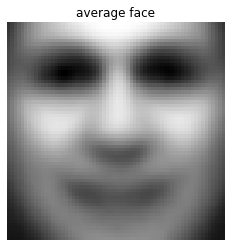

In [4]:
## 평균 얼굴 벡터 시각화해보기
plt.imshow(pca.mean_.reshape((64,64)), cmap='gray')
plt.axis('off')
plt.title('average face')

plt.show()

In [13]:
## PCA 적용 (0~1 실수형 파라미터 입력 -> 데이터에서 표현하고자 하는 분산의 양을 지정)
# 85% 유지
pca = PCA(n_components=0.85)
eigenVectors = pca.fit_transform(faces)
print("n_components = {}".format(pca.n_components_))
print("explained_variance_ratio = {}".format(pca.explained_variance_ratio_))  # 48개의 고유값들

n_components = 48
explained_variance_ratio = [0.29378922 0.12629319 0.06304694 0.04017165 0.03541217 0.02161253
 0.01987717 0.01758744 0.01693449 0.01495816 0.0132944  0.01280355
 0.01112295 0.0092924  0.00858141 0.00794731 0.00766109 0.00759214
 0.00704212 0.00646335 0.00621586 0.00597905 0.00572021 0.00535124
 0.00513402 0.00505057 0.00479954 0.00462193 0.004467   0.00438083
 0.00432892 0.00414855 0.00391991 0.00371639 0.00365352 0.00352683
 0.00335685 0.00329078 0.00315162 0.00299622 0.0029649  0.00293174
 0.00278404 0.00273643 0.00256466 0.00254946 0.0024336  0.00239381]


In [6]:
sum(pca.explained_variance_ratio_)

0.8506521565968777

## 4) PCA 결과 확인하기
### a. i번째 component 확인하기

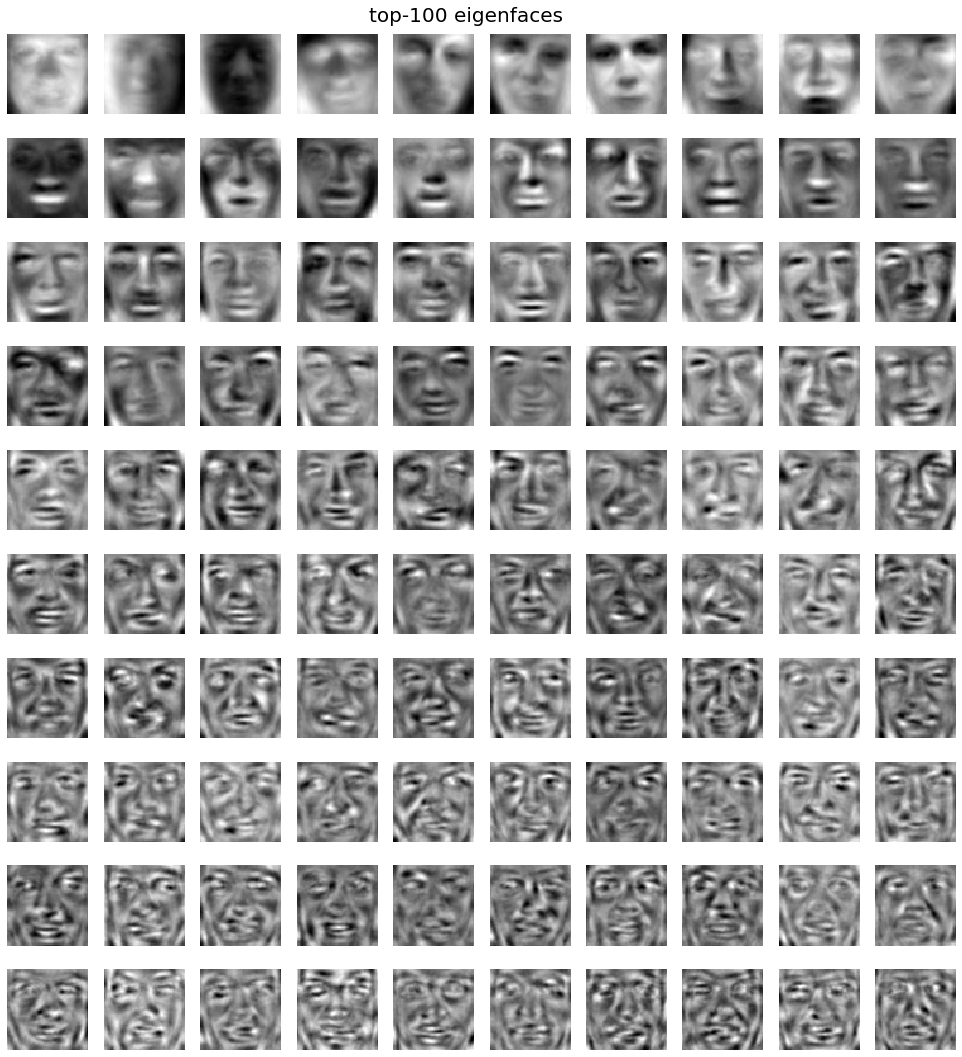

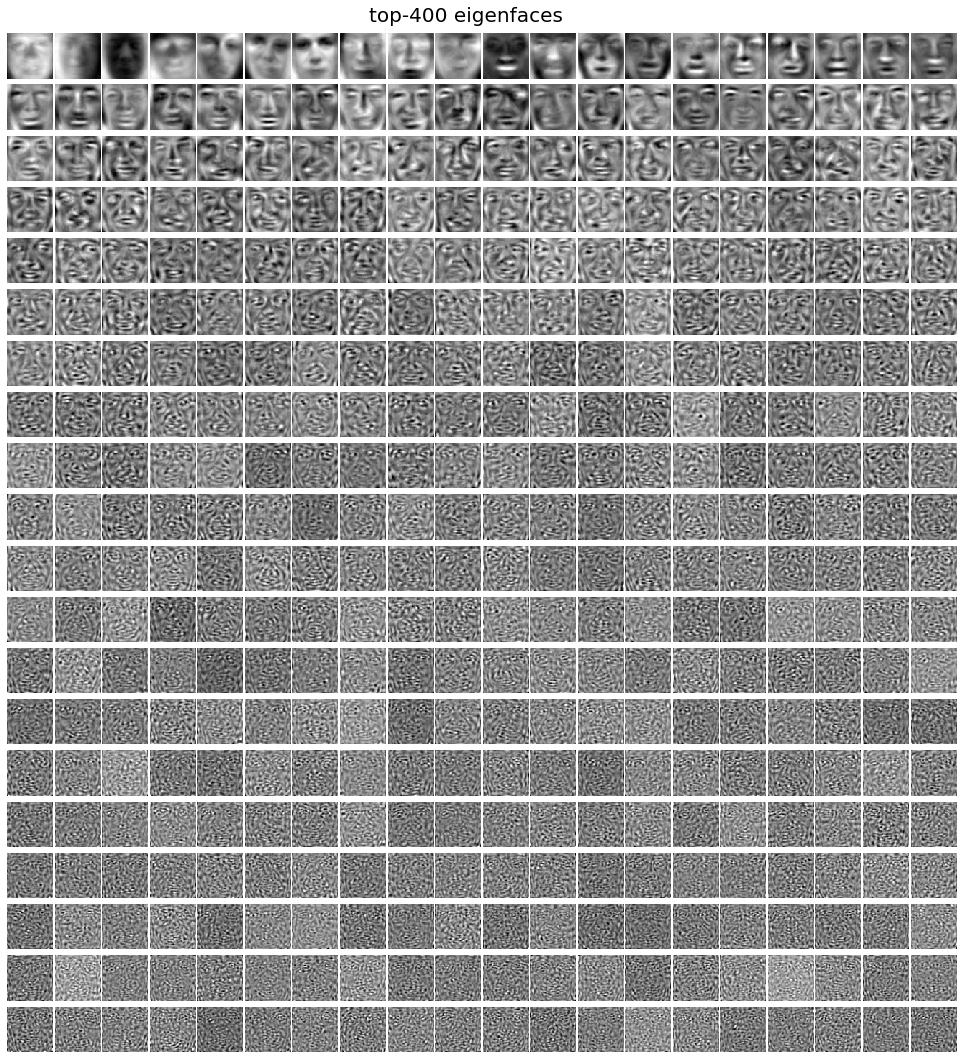

In [7]:
from sklearn.decomposition import PCA

## 2차원 -> 1차원 벡터 형태로 변환
faces = faces.reshape((nData, -1))

## PCA 적용
pca = PCA(n_components=400)
eigenVectors = pca.fit_transform(faces)

## top-100 eigenface 시각화
plt.figure(figsize=(17,17))
plt.suptitle('top-100 eigenfaces', fontsize=20)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(pca.components_[i].reshape((64,64)), cmap='gray')
    plt.axis('off')

plt.subplots_adjust(top=0.96)
plt.show()

## top-400 eigenface 시각화
plt.figure(figsize=(17,17))
plt.suptitle('top-400 eigenfaces', fontsize=20)
for i in range(400):
    plt.subplot(20,20,i+1)
    plt.imshow(pca.components_[i].reshape((64,64)), cmap='gray')
    plt.axis('off')

plt.subplots_adjust(top=0.96, wspace=0.05, hspace=0.05)
plt.show()

### b. 시각화를 통한 component의 의미 유추하기

In [8]:
meanFace = pca.mean_.reshape((64,64))
components = []
for k in range(5):
    components.append(pca.components_[k].reshape((64,64)))

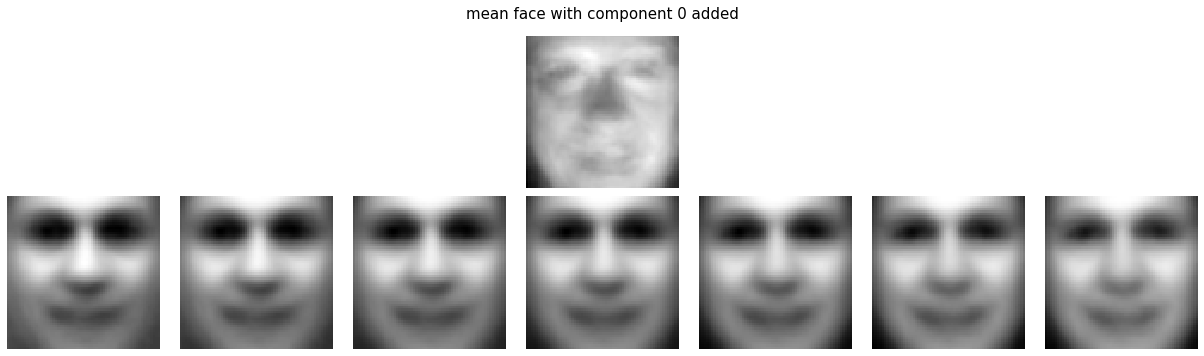

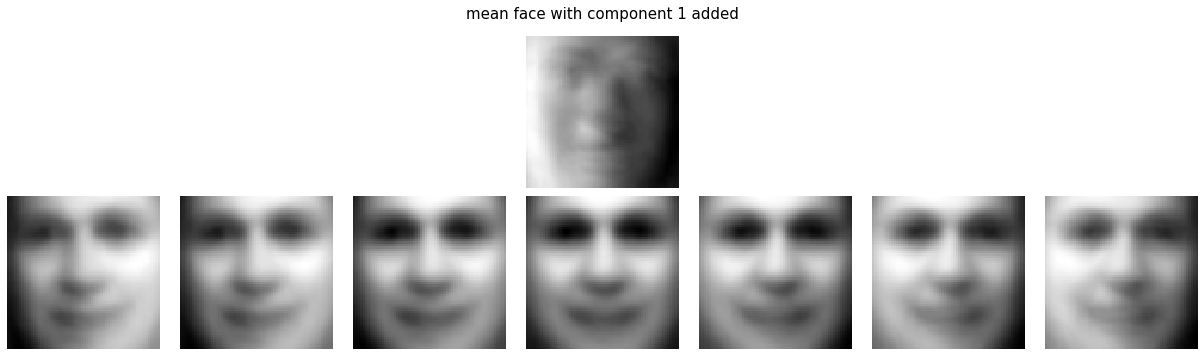

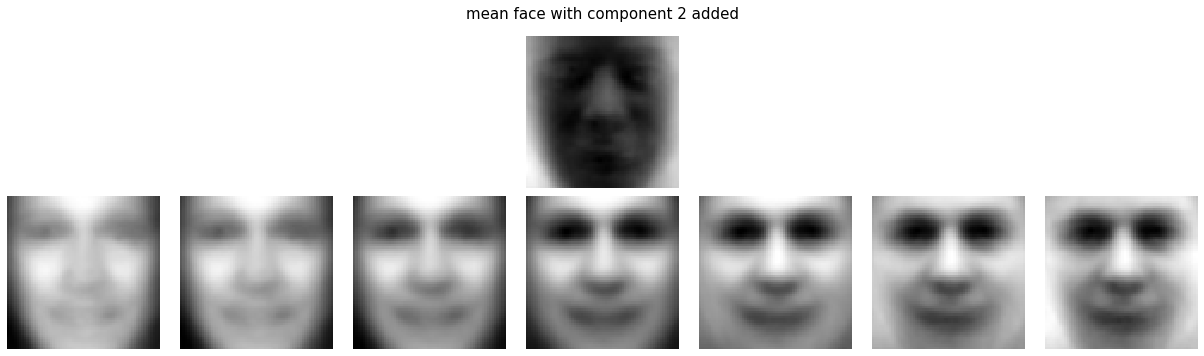

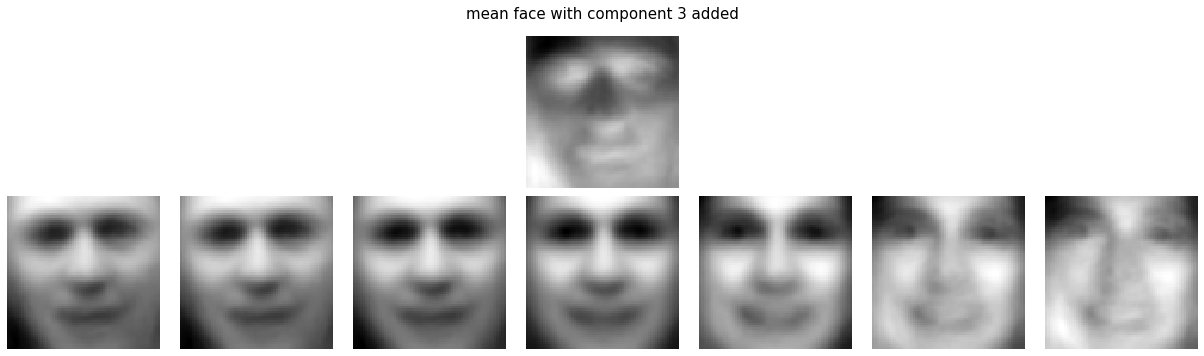

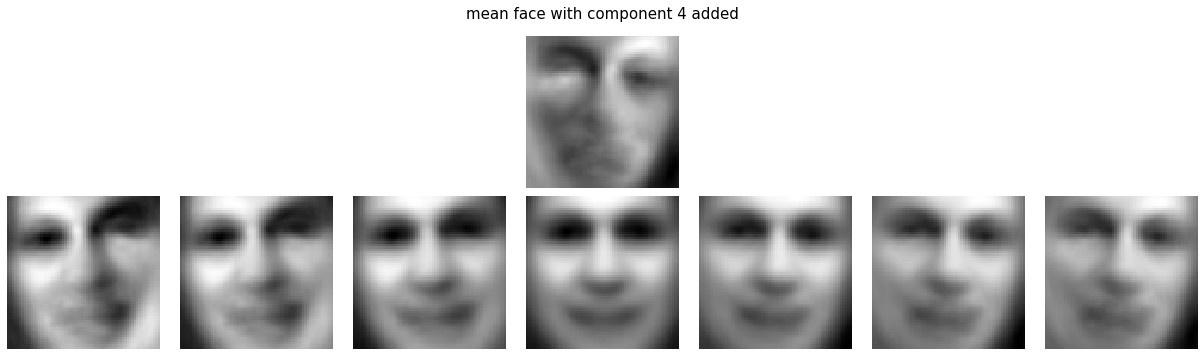

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# k = 0  # 몇 번째 성분을 사용할 것인지

for k in range(5):
    plt.figure(figsize=(17, 5))
    plt.subplot(2, 7, 4)
    plt.imshow(components[k], cmap='gray')
    plt.axis('off')

    for i in range(7):
        plt.subplot(2, 7, 8+i)
        w = (i - 3) * 500   # component의 가중치
        plt.imshow(meanFace + w * components[k], cmap='gray')
        plt.axis('off')

    plt.suptitle("mean face with component {} added".format(k), fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, wspace=0.05, hspace=0.05)

    plt.show()

## 4) eigenface 생성하기

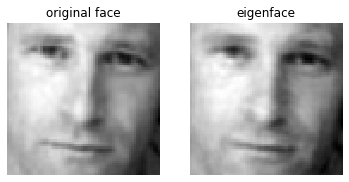

In [10]:
idx = 0     # 테스트하고자 하는 얼굴 영상의 인덱스

## 상위 n개의 eigenvector를 사용하여 eigenface 생성
eigenFaces = pca.inverse_transform(eigenVectors)    # 수식 (3)에 해당

## 결과 시각화
plt.subplot(1,2,1)
plt.imshow(faces[idx].reshape((64,64)), cmap = 'gray')
plt.title('original face')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eigenFaces[idx].reshape((64,64)), cmap = 'gray')
plt.title('eigenface')
plt.axis('off')

plt.show()

## ※ optional) principal component 개수에 따른 재구성 영상 생성하기
- 다음 링크에서 ffmpeg 설치 후, 코드 내 plt.rcParams['animation.ffmpeg_path']에 ffmpeg.exe 파일 경로 설정  
  - https://ffmpeg.zeranoe.com/builds/

In [11]:
# from sklearn.decomposition import PCA
# from matplotlib import animation

# fig = plt.figure(tight_layout=True)
# ax = plt.subplot(1,1,1)
# ims = []
# for i in range(nData-1,0,-1):
#     pca = PCA(n_components=i)
#     eigenVectors = pca.fit_transform(faces)
#     eigenFaces = pca.inverse_transform(eigenVectors)

#     im = plt.imshow(eigenFaces[idx].reshape((64,64)), cmap='gray', animated=True)
#     tl = plt.text(0.5, 1.05, '# of eigen faces: %d'%i, ha='center', va='top', transform=ax.transAxes)
#     plt.axis('off')
#     ims.append([im, tl])
    
# ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=False)

# plt.rcParams['animation.ffmpeg_path'] ='D:/libs/ffmpeg/bin/ffmpeg.exe'
# writer = animation.FFMpegWriter(fps=15, codec='libx264', extra_args=['-pix_fmt', 'yuv420p', '-profile:v', 'high', '-tune', 'animation', '-crf', '18'])
# ani.save('eigenface.mp4', writer=writer)